## <font color="maroon"><h4 align="center">Pandas Group By</font>

**In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.** 

In [3]:
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,01-01-2017,new york,32.0,6,Rain
1,01-02-2017,new york,36.0,7,Sunny
2,01-03-2017,new york,28.0,12,Snow
3,01-04-2017,new york,33.0,7,Sunny
4,01-01-2017,mumbai,90.0,5,Sunny
5,01-02-2017,mumbai,85.0,12,Fog
6,01-03-2017,mumbai,87.0,15,Fog
7,01-04-2017,mumbai,92.0,5,Rain
8,01-01-2017,paris,45.0,20,Sunny
9,01-02-2017,paris,NaN,13,Cloudy


<h1>this is title</h1>

### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [4]:
g = df.groupby("city")
g

**DataFrameGroupBy object looks something like below,**

<img src="group_by_cities.png">

In [12]:
g = df.groupby("city")
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)    

city: mumbai


data:           day    city  temperature  windspeed  event
4  01-01-2017  mumbai         90.0          5  Sunny
5  01-02-2017  mumbai         85.0         12    Fog
6  01-03-2017  mumbai         87.0         15    Fog
7  01-04-2017  mumbai         92.0          5   Rain
city: new york


data:           day      city  temperature  windspeed  event
0  01-01-2017  new york         32.0          6   Rain
1  01-02-2017  new york         36.0          7  Sunny
2  01-03-2017  new york         28.0         12   Snow
3  01-04-2017  new york         33.0          7  Sunny
city: paris


data:            day   city  temperature  windspeed   event
8   01-01-2017  paris         45.0         20   Sunny
9   01-02-2017  paris          NaN         13  Cloudy
10  01-03-2017  paris         54.0          8  Cloudy
11  01-04-2017  paris         42.0         10  Cloudy


**This is similar to SQL,**

**SELECT * from weather_data GROUP BY city**

In [6]:
d1=g.get_group('mumbai')
d1.sort_values(by='temperature')
#d1
#g.get_group('mumbai').sort_values('temperature')

,day,city,temperature,windspeed,event
5,01-02-2017,mumbai,85.0,12,Fog
6,01-03-2017,mumbai,87.0,15,Fog
4,01-01-2017,mumbai,90.0,5,Sunny
7,01-04-2017,mumbai,92.0,5,Rain


In [7]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,01-04-2017,92.0,15,Sunny
new york,01-04-2017,36.0,12,Sunny
paris,01-04-2017,54.0,20,Sunny


In [12]:

y=g['temperature'].max()
y.values

array([92, 36, 54], dtype=int64)

In [ ]:
g.mean()

**This method of splitting your dataset in smaller groups and then applying an operation 
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

<img src="split_apply_combine.png">

In [15]:
d1=g.get_group('mumbai')
d1[['temperature','windspeed']].min()
   

temperature    85
windspeed       5
dtype: int64

In [5]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [6]:
g.size()


city
mumbai      4
new york    4
paris       4
dtype: int64

In [7]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

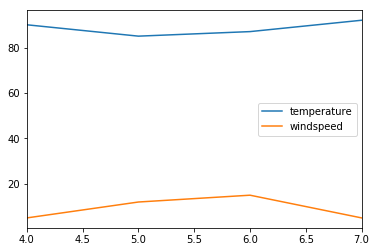

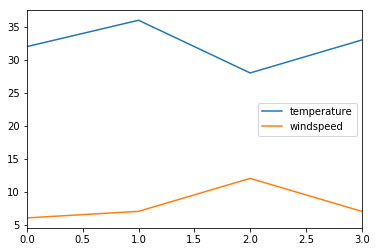

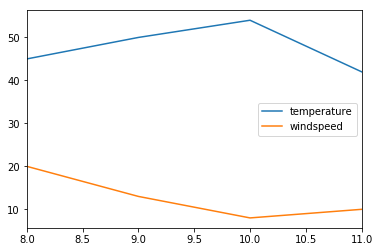

In [8]:
%matplotlib inline
g.plot()

<h4>Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups<h4>
<ol>
    <li>Days when temperature was between 80 and 90</li>
    <li>Days when it was between 50 and 60</li>
    <li>Days when it was anything else</li>
</ol>

For this you need to write custom grouping function and pass that to groupby

In [8]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    elif 30 <= df[col].loc[idx] <=40:
        return '30-40'
    else:
        return 'others'

In [9]:
#x will be the index position in lambda
g1 = df.groupby(lambda x: grouper(df, x, 'temperature'))
g1

In [10]:
for key, d in g1:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 30-40

          day      city  temperature  windspeed  event
0  01-01-2017  new york         32.0          6   Rain
1  01-02-2017  new york         36.0          7  Sunny
3  01-04-2017  new york         33.0          7  Sunny
Group by Key: 50-60

           day   city  temperature  windspeed   event
10  01-03-2017  paris         54.0          8  Cloudy
Group by Key: 80-90

          day    city  temperature  windspeed  event
4  01-01-2017  mumbai         90.0          5  Sunny
5  01-02-2017  mumbai         85.0         12    Fog
6  01-03-2017  mumbai         87.0         15    Fog
Group by Key: others

           day      city  temperature  windspeed   event
2   01-03-2017  new york         28.0         12    Snow
7   01-04-2017    mumbai         92.0          5    Rain
8   01-01-2017     paris         45.0         20   Sunny
9   01-02-2017     paris          NaN         13  Cloudy
11  01-04-2017     paris         42.0         10  Cloudy


In [14]:
%matplotlib inline
#g.plot()

g.get_group('mumbai').sort_values('temperature')

,day,city,temperature,windspeed,event
5,01-02-2017,mumbai,85.0,12,Fog
6,01-03-2017,mumbai,87.0,15,Fog
4,01-01-2017,mumbai,90.0,5,Sunny
7,01-04-2017,mumbai,92.0,5,Rain


<function matplotlib.pyplot.show(close=None, block=None)>

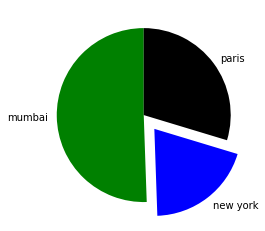

In [14]:
g.max()
df_temp=g['temperature'].max()
x=df_temp.index
y=df_temp.values
cols=['g','b','k']
import matplotlib.pyplot as plt
plt. e(y,labels=x,colors=cols,startangle=90,explode=(0,0.2,0))
plt.show()
#plt.pie(slices,labels=activities,colors=cols,startangle=90,counterclock=False)

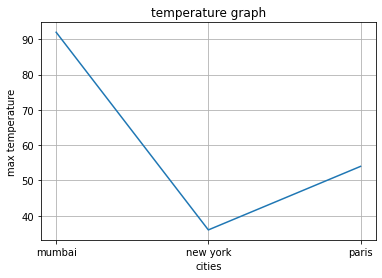

In [20]:
g.max()
df_temp=g['temperature'].max()
x=df_temp.index
y=df_temp.values
cols=['g','b','k']
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel("cities")
plt.ylabel("max temperature")
plt.title("temperature graph")
plt.grid()
plt.show()